In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import tensorflow as tf
import keras 
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D, UpSampling2D, Dropout, Flatten, Dense

In [2]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
# to get the shape of the data 
print("x_train shape:",x_train.shape)
print("x_test shape", x_test.shape)

11490434/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28)
x_test shape (10000, 28, 28)


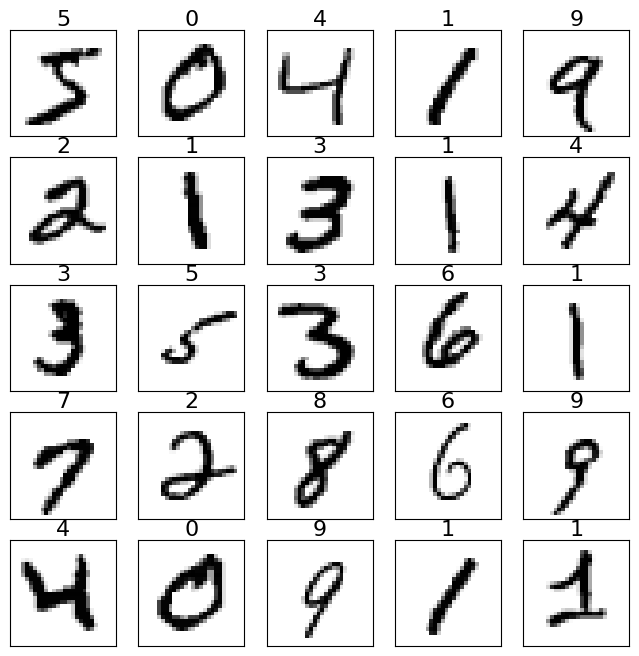

In [3]:
plt.figure(figsize = (8,8))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.title(str(y_train[i]),fontsize = 16, color = 'black', pad = 2)
  plt.imshow(x_train[i], cmap = plt.cm.binary )
  plt.xticks([])
  plt.yticks([])

plt.show()

In [4]:
val_images = x_test[:9000]
test_images = x_test[9000:]

In [5]:
val_images = val_images.astype('float32') / 255.0
val_images = np.reshape(val_images,(val_images.shape[0],28,28,1))

test_images = test_images.astype('float32') / 255.0
test_images = np.reshape(test_images,(test_images.shape[0],28,28,1))

train_images = x_train.astype("float32") / 255.0
train_images = np.reshape(train_images, (train_images.shape[0],28,28,1))

In [6]:
factor = 0.3
train_noisy_images = train_images + factor * np.random.normal(loc = 0.0,scale = 1.0,size = train_images.shape)
val_noisy_images = val_images + factor * np.random.normal(loc = 0.0,scale = 1.0,size = val_images.shape)
test_noisy_images = test_images + factor * np.random.normal(loc = 0.0,scale = 1.0,size = test_images.shape)

# here maximum pixel value for our images may exceed 1 so we have to clip the images
train_noisy_images = np.clip(train_noisy_images,0.,1.)
val_noisy_images = np.clip(val_noisy_images,0.,1.)
test_noisy_images = np.clip(test_noisy_images,0.,1.)

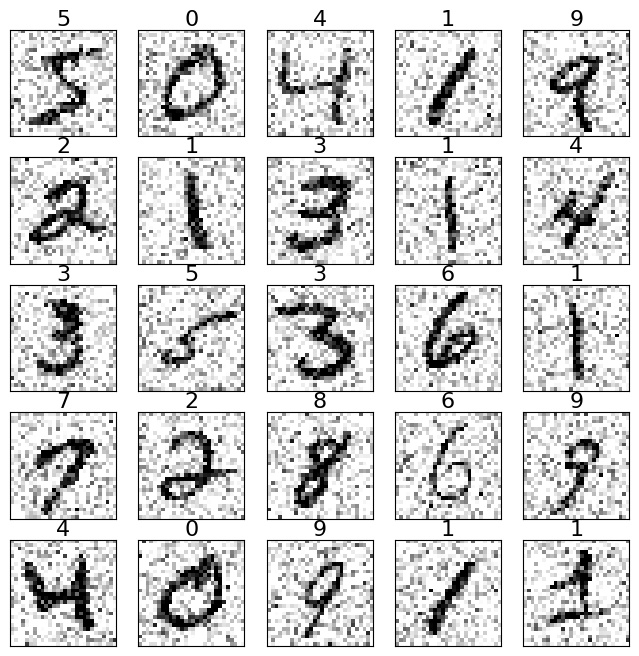

In [7]:
plt.figure(figsize = (8,8))

for i in range(25):      
      plt.subplot(5,5,i+1)
      plt.title(str(y_train[i]),fontsize = 16, color = 'black', pad = 2)
      plt.imshow(train_noisy_images[i].reshape(1,28,28)[0], cmap = plt.cm.binary )
      plt.xticks([])
      plt.yticks([])

plt.show()

In [8]:
mlp = Sequential()

#encoder
mlp.add(tf.keras.layers.Dense(units=128, activation='relu',input_shape=(28,28,1)))
mlp.add(tf.keras.layers.BatchNormalization())
mlp.add(tf.keras.layers.Dense(units=256, activation='relu'))
mlp.add(tf.keras.layers.BatchNormalization())
mlp.add(tf.keras.layers.Dense(units=512, activation='relu'))
mlp.add(tf.keras.layers.BatchNormalization())
mlp.add(tf.keras.layers.Dense(units=512, activation='relu'))


#decoder
mlp.add(tf.keras.layers.Dense(units=512, activation='relu'))
mlp.add(tf.keras.layers.Dense(units=512, activation='relu'))
mlp.add(tf.keras.layers.BatchNormalization())
mlp.add(tf.keras.layers.Dense(units=256, activation='relu'))
mlp.add(tf.keras.layers.BatchNormalization())
mlp.add(tf.keras.layers.Dense(units=128, activation='relu'))
mlp.add(tf.keras.layers.Dense(units=64, activation='relu'))
mlp.add(tf.keras.layers.BatchNormalization())
mlp.add(tf.keras.layers.Dense(units=1, activation='relu'))

mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 28, 28, 128)       256       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 128)      512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 28, 28, 256)       33024     
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 256)      1024      
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 28, 28, 512)       131584    
                                                                 
 batch_normalization_2 (Batc  (None, 28, 28, 512)      2

In [9]:
OPTIMIZER =  tf.keras.optimizers.Adam(learning_rate = 0.001)
LOSS = 'mean_squared_error'

In [10]:
mlp.compile(optimizer =OPTIMIZER, loss = LOSS, metrics = ['accuracy'])

In [11]:
EPOCHS = 100
BATCH_SIZE = 256
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='mlp.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]
history = mlp.fit(train_noisy_images, train_images, batch_size = BATCH_SIZE, epochs = EPOCHS, validation_data = (val_noisy_images, val_images), callbacks = [my_callbacks])

Epoch 1/100
235/235 [==============================] - 147s 583ms/step - loss: 0.0408 - accuracy: 0.7989 - val_loss: 0.1136 - val_accuracy: 0.8079
Epoch 2/100
235/235 [==============================] - 142s 606ms/step - loss: 0.0270 - accuracy: 0.8052 - val_loss: 0.0493 - val_accuracy: 0.8079
Epoch 3/100
235/235 [==============================] - 140s 595ms/step - loss: 0.0269 - accuracy: 0.8052 - val_loss: 0.0276 - val_accuracy: 0.8083
Epoch 4/100
235/235 [==============================] - 142s 605ms/step - loss: 0.0269 - accuracy: 0.8053 - val_loss: 0.0271 - val_accuracy: 0.8041
Epoch 5/100
235/235 [==============================] - 142s 606ms/step - loss: 0.0269 - accuracy: 0.8053 - val_loss: 0.0270 - val_accuracy: 0.8058
Epoch 6/100
235/235 [==============================] - 142s 605ms/step - loss: 0.0269 - accuracy: 0.8053 - val_loss: 0.0273 - val_accuracy: 0.8040
Epoch 7/100
235/235 [==============================] - 140s 594ms/step - loss: 0.0269 - accuracy: 0.8053 - val_loss: 0

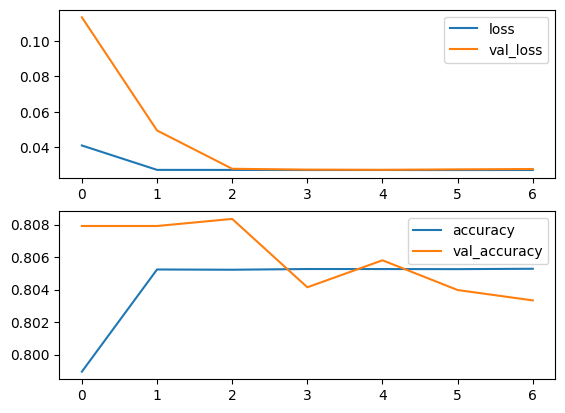

In [14]:
plt.subplot(2,1,1)
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend(loc = 'best')
plt.subplot(2,1,2)
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.legend(loc = 'best')
plt.show()

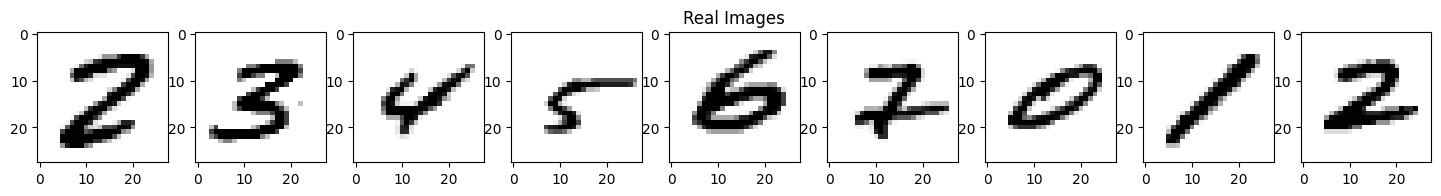

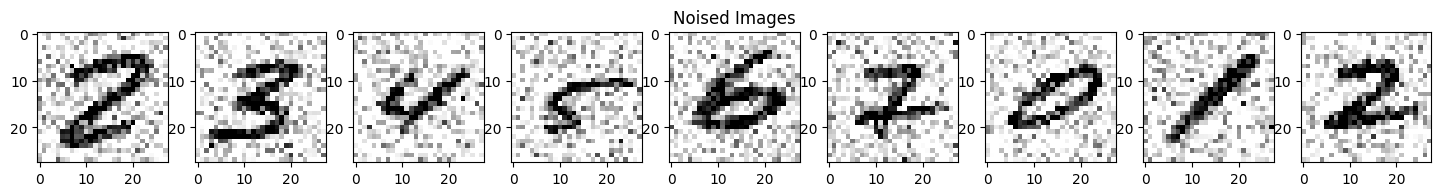

1/1 [==============================] - 0s 23ms/step


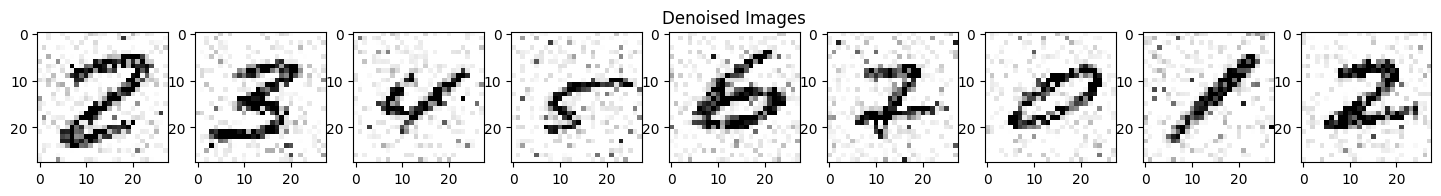

In [15]:
plt.figure(figsize = (18,18))
for i in range(10,19):
    plt.subplot(9,9,i)
    if(i == 14):
        plt.title('Real Images') 
    plt.imshow(test_images[i].reshape(1,28,28)[0], cmap = plt.cm.binary)
plt.show()


plt.figure(figsize = (18,18))
for i in range(10,19):
    if(i == 15):
        plt.title('Noised Images') 
    plt.subplot(9,9,i)
    plt.imshow(test_noisy_images[i].reshape(1,28,28)[0], cmap = plt.cm.binary)
plt.show()


plt.figure(figsize = (18,18))
for i in range(10,19):  
    if(i == 15):
        plt.title('Denoised Images') 
    
    plt.subplot(9,9,i)
    plt.imshow(mlp.predict(test_noisy_images[i].reshape(1,28,28,1)).reshape(1,28,28)[0], cmap = plt.cm.binary) 
plt.show()

# CAE

In [16]:
model = Sequential()
# encoder network
model.add(Conv2D(filters = 128, kernel_size = (2,2), activation = 'relu', padding = 'same', input_shape = (28,28,1)))
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(filters = 256, kernel_size = (2,2),strides = (2,2), activation = 'relu', padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(filters = 512, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(filters = 512, kernel_size = (2,2),strides = (2,2), activation = 'relu', padding = 'same'))

# decoder network
model.add(Conv2D(filters = 512, kernel_size = (2,2), activation = 'relu', padding = 'same'))

model.add(tf.keras.layers.Conv2DTranspose(filters = 512, kernel_size = (2,2), strides = (2,2),activation = 'relu', padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(filters = 256, kernel_size = (2,2), activation = 'relu', padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())


model.add(Conv2D(filters = 128, kernel_size = (2,2), activation = 'relu', padding = 'same'))
model.add(tf.keras.layers.Conv2DTranspose(filters = 128, kernel_size = (2,2),strides = (2,2), activation = 'relu', padding = 'same'))

model.add(Conv2D(filters = 64, kernel_size = (2,2), activation = 'relu', padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(filters = 1, kernel_size = (2,2), activation = 'relu', padding = 'same'))


# to get the summary of the model
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 128)       640       
                                                                 
 batch_normalization_6 (Batc  (None, 28, 28, 128)      512       
 hNormalization)                                                 
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 256)       131328    
                                                                 
 batch_normalization_7 (Batc  (None, 14, 14, 256)      1024      
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 512)       1180160   
                                                                 
 batch_normalization_8 (Batc  (None, 14, 14, 512)     

In [17]:
optimizer =  tf.keras.optimizers.Adam(learning_rate = 0.001)
LOSS = 'mean_squared_error'
model.compile(optimizer, loss = LOSS, metrics = ['accuracy'])

In [18]:
EPOCHS = 100
BATCH_SIZE = 256
my_callbacks_cae = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]
history = model.fit(train_noisy_images, train_images, batch_size = BATCH_SIZE, epochs = EPOCHS, validation_data = (val_noisy_images, val_images), callbacks = my_callbacks_cae)

Epoch 1/100
235/235 [==============================] - 89s 308ms/step - loss: 0.0444 - accuracy: 0.8032 - val_loss: 0.1135 - val_accuracy: 0.8079
Epoch 2/100
235/235 [==============================] - 71s 302ms/step - loss: 0.0066 - accuracy: 0.8150 - val_loss: 0.0472 - val_accuracy: 0.8109
Epoch 3/100
235/235 [==============================] - 69s 292ms/step - loss: 0.0057 - accuracy: 0.8151 - val_loss: 0.0075 - val_accuracy: 0.8149
Epoch 4/100
235/235 [==============================] - 68s 291ms/step - loss: 0.0053 - accuracy: 0.8152 - val_loss: 0.0052 - val_accuracy: 0.8149
Epoch 5/100
235/235 [==============================] - 68s 290ms/step - loss: 0.0051 - accuracy: 0.8152 - val_loss: 0.0063 - val_accuracy: 0.8146
Epoch 6/100
235/235 [==============================] - 70s 300ms/step - loss: 0.0050 - accuracy: 0.8152 - val_loss: 0.0050 - val_accuracy: 0.8149
Epoch 7/100
235/235 [==============================] - 71s 300ms/step - loss: 0.0048 - accuracy: 0.8152 - val_loss: 0.0050 -

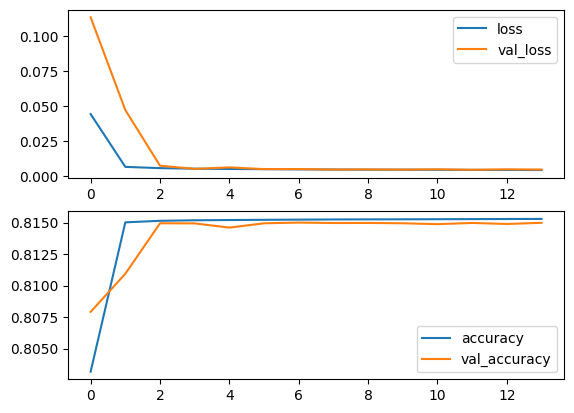

In [19]:
plt.subplot(2,1,1)
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend(loc = 'best')
plt.subplot(2,1,2)
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.legend(loc = 'best')
plt.show()

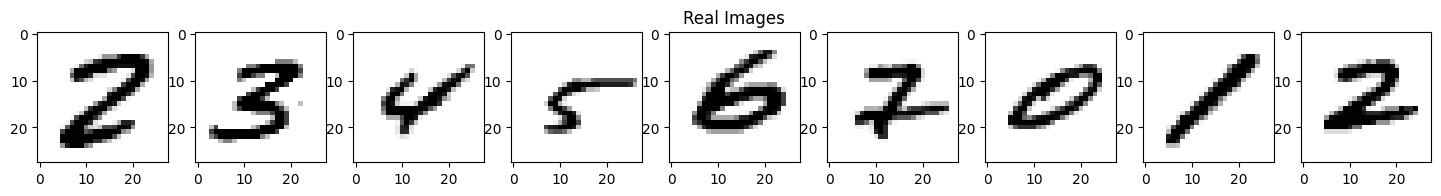

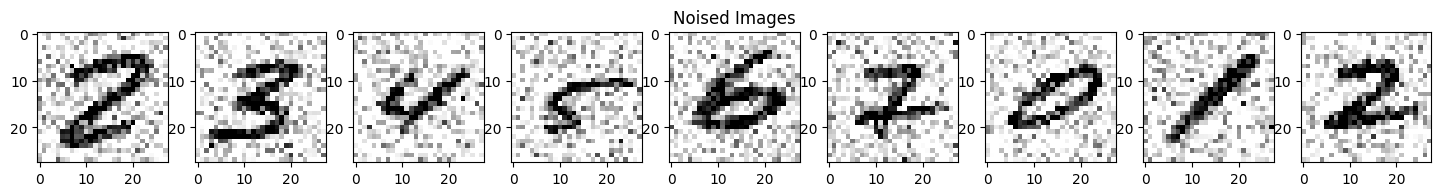

1/1 [==============================] - 0s 18ms/step


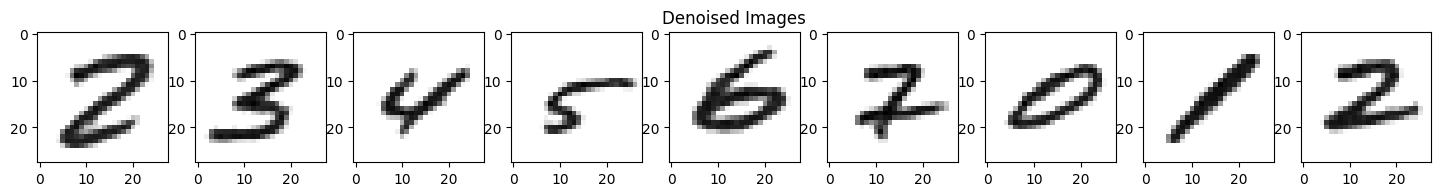

In [20]:
plt.figure(figsize = (18,18))
for i in range(10,19):
    plt.subplot(9,9,i)
    if(i == 14):
        plt.title('Real Images') 
    plt.imshow(test_images[i].reshape(1,28,28)[0], cmap = plt.cm.binary)
plt.show()


plt.figure(figsize = (18,18))
for i in range(10,19):
    if(i == 15):
        plt.title('Noised Images') 
    plt.subplot(9,9,i)
    plt.imshow(test_noisy_images[i].reshape(1,28,28)[0], cmap = plt.cm.binary)
plt.show()


plt.figure(figsize = (18,18))
for i in range(10,19):  
    if(i == 15):
        plt.title('Denoised Images') 
    
    plt.subplot(9,9,i)
    plt.imshow(model.predict(test_noisy_images[i].reshape(1,28,28,1)).reshape(1,28,28)[0], cmap = plt.cm.binary) 
plt.show()